In [2]:
import torch
import torch.nn as nn
import torch.autograd as autograd

from modules.pinn import *

import matplotlib.pyplot as plt
import pandas as pd


In [3]:
def make_tensor(x):
    return torch.tensor(x).unsqueeze(0).T.type(torch.FloatTensor).cuda()

<All keys matched successfully>

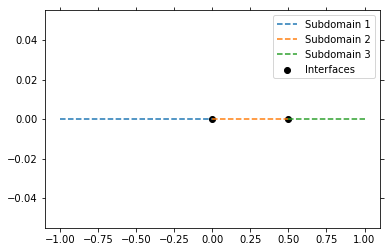

In [82]:
fpath = './data_final/models/1d_beam_prob3.data'
state_dict = torch.load(fpath)

# points = [-1.0,-0.5, 0.0, 0.5, 1.0]
points = [-1.0, 0.0, 0.5,1.0]
# points = [-1.0, 1.0]
domain_no = len(points) - 1
global_lb = -1.0
global_rb = 1.0

figure_path = "./figures/"

model = CPINN(domain_no, global_lb, global_rb, figure_path)

sample = {'Model{}'.format(i+1): PINN(i).cuda() for i in range(domain_no)}
# points = [-1.0, 0.0, 1.0]
model.module_update(sample)
model.make_domains(points)
model.make_boundaries(points)
model.plot_domains()

model.load_state_dict(state_dict)

In [83]:
plots = np.arange(-0.99, 1.01, 0.02)
dw = 0.00001

# plots = np.arange(-0.01, 0.01, dw) - 0.5 
points_tensor = make_tensor(plots)


plots

array([-0.99, -0.97, -0.95, -0.93, -0.91, -0.89, -0.87, -0.85, -0.83,
       -0.81, -0.79, -0.77, -0.75, -0.73, -0.71, -0.69, -0.67, -0.65,
       -0.63, -0.61, -0.59, -0.57, -0.55, -0.53, -0.51, -0.49, -0.47,
       -0.45, -0.43, -0.41, -0.39, -0.37, -0.35, -0.33, -0.31, -0.29,
       -0.27, -0.25, -0.23, -0.21, -0.19, -0.17, -0.15, -0.13, -0.11,
       -0.09, -0.07, -0.05, -0.03, -0.01,  0.01,  0.03,  0.05,  0.07,
        0.09,  0.11,  0.13,  0.15,  0.17,  0.19,  0.21,  0.23,  0.25,
        0.27,  0.29,  0.31,  0.33,  0.35,  0.37,  0.39,  0.41,  0.43,
        0.45,  0.47,  0.49,  0.51,  0.53,  0.55,  0.57,  0.59,  0.61,
        0.63,  0.65,  0.67,  0.69,  0.71,  0.73,  0.75,  0.77,  0.79,
        0.81,  0.83,  0.85,  0.87,  0.89,  0.91,  0.93,  0.95,  0.97,
        0.99])

In [84]:
output = model(points_tensor)


In [85]:
fname = "./data_final/FEM/prob3.txt"
data = np.loadtxt(fname=fname)

x, y, u = data.T
u = abs(u.reshape(-1, 1))

In [86]:
output = abs(output.cpu().detach().numpy())

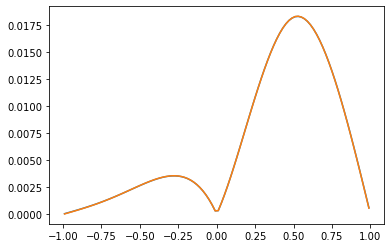

In [87]:
plt.plot(x, u)
plt.plot(x, output)

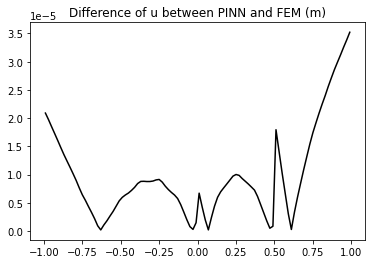

In [88]:
diff = abs(u - output)
plt.plot(x, diff, c='k')
plt.title("Difference of u between PINN and FEM (m)")
plt.savefig("./data_final/figures/1d_beam_prob3_u_diff.svg")

In [49]:
fpath = './models/prob4.data'
state_dict = torch.load(fpath)

# points = [-1.0, -0.5, 0.0, 0.5, 1.0]
points = [-1.0, 0.0, 1.0]
domain_no = len(points) - 1
global_lb = -1.0
global_rb = 1.0

figure_path = None

model = CPINN(domain_no, global_lb, global_rb, figure_path)

sample = {'Model{}'.format(i+1): PINN(i).cuda() for i in range(domain_no)}
# points = [-1.0, 0.0, 1.0]
model.module_update(sample)
model.make_domains(points)
model.make_boundaries(points)

model.load_state_dict(state_dict)

output2 = model(points_tensor)

In [50]:

# plt.plot(plots, np.abs(output2.cpu().detach().numpy()),  'g', linewidth=2.5, label='PINN')
# plt.plot(x, u, 'b', linewidth=2.5, label='FEM')
plt.plot(plots, np.abs(output.cpu().detach().numpy()), 'r--', linewidth=2.5, label='PINN')
plt.xlabel('x (m)')
plt.ylabel('u (m)')
plt.rc('font', size=10)
plt.legend()
# plt.savefig('./figures/res2.svg')


AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np

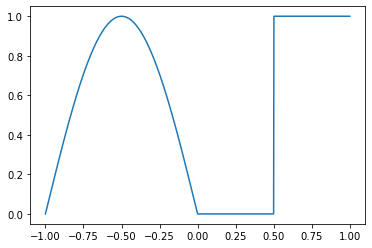

In [18]:
x_f_s = np.linspace(-1.0, 1.0, 1000)
x_f = torch.from_numpy(x_f_s).float()
zeros = torch.zeros(x_f.shape)
ones = torch.ones(x_f.shape)
res = torch.where(0 > x_f, ones * torch.sin(-np.pi * x_f), zeros) + torch.where(0.5 < x_f, ones, zeros)
plt.plot(x_f_s, res.cpu().detach().numpy())

In [8]:
logpath = "./figures/2d_plane_prob5/convergence_model{}.csv".format(1)

In [9]:
df = pd.read_csv(logpath)

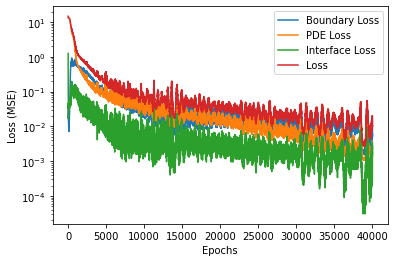

In [10]:
plt.plot(df['Loss_B'][:40000],label='Boundary Loss')
plt.plot(df['Loss_F'][:40000], label='PDE Loss')
plt.plot(df['Loss_I'][:40000], label='Interface Loss')
plt.plot(df['Loss'][:40000], label='Loss')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('./figures/2d_plane_prob2_tra2.svg')

In [112]:
logpath = "./figures/prob3/convergence_model{}.csv".format(0)
df_0 = pd.read_csv(logpath)

In [113]:
logpath = "./figures/prob3/convergence_model{}.csv".format(1)
df_1 = pd.read_csv(logpath)

In [114]:
logpath = "./figures/prob3/convergence_model{}.csv".format(2)
df_2 = pd.read_csv(logpath)

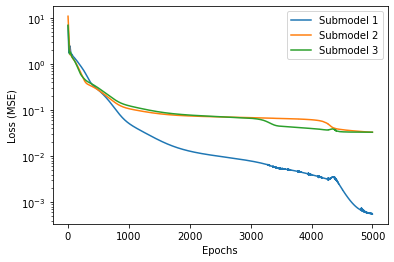

In [119]:
plt.plot(df_0['Loss'][:5000], label='Submodel 1')
plt.plot(df_1['Loss'][:5000], label='Submodel 2')
plt.plot(df_2['Loss'][:5000], label='Submodel 3')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('./figures/tra3.svg')

In [3]:
logpath = "./figures/prob1/convergence_model{}.csv".format(0)
df_0 = pd.read_csv(logpath)

In [4]:
logpath = "./figures/prob4/convergence_model{}.csv".format(0)
df_1 = pd.read_csv(logpath)

In [5]:
logpath = "./figures/prob4/convergence_model{}.csv".format(1)
df_2 = pd.read_csv(logpath)

In [6]:
logpath = "./figures/prob5/convergence_model{}.csv".format(0)
df_3 = pd.read_csv(logpath)

In [7]:
logpath = "./figures/prob5/convergence_model{}.csv".format(1)
df_4 = pd.read_csv(logpath)

In [8]:
logpath = "./figures/prob5/convergence_model{}.csv".format(2)
df_5 = pd.read_csv(logpath)

In [12]:
logpath = "./figures/prob6/convergence_model{}.csv".format(0)
df_6 = pd.read_csv(logpath)

In [13]:
logpath = "./figures/prob6/convergence_model{}.csv".format(1)
df_7 = pd.read_csv(logpath)

In [14]:
logpath = "./figures/prob6/convergence_model{}.csv".format(2)
df_8 = pd.read_csv(logpath)

In [15]:
logpath = "./figures/prob6/convergence_model{}.csv".format(3)
df_9 = pd.read_csv(logpath)

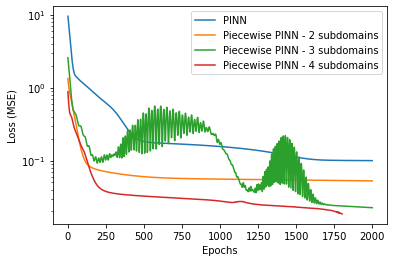

In [16]:
plt.plot(df_0['Loss'][:2000], label='PINN')
plt.plot((df_1['Loss'][:2000] + df_2['Loss'][:2000]) / 2, label='Piecewise PINN - 2 subdomains')
plt.plot((df_3['Loss'][:2000] + df_4['Loss'][:2000] + df_5['Loss'][:2000]) / 3, label='Piecewise PINN - 3 subdomains')
plt.plot((df_6['Loss'][:2000] + df_7['Loss'][:2000] + df_8['Loss'][:2000] + df_9['Loss'][:2000]) / 4, label='Piecewise PINN - 4 subdomains')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
# plt.savefig('./figures/comp1.svg')

In [117]:
logpath = "./figures/2d_plate_prob18/convergence_model{}.csv".format(0)
df_0 = pd.read_csv(logpath)

In [118]:
logpath = "./figures/2d_plate_prob18/convergence_model{}.csv".format(1)
df_1 = pd.read_csv(logpath)

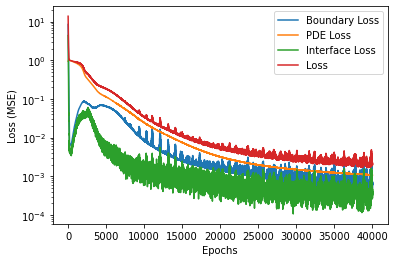

In [122]:
plt.plot(df_0['Loss_B'][:40000],label='Boundary Loss')
plt.plot(df_0['Loss_F'][:40000], label='PDE Loss')
plt.plot(df_0['Loss_I'][:40000], label='Interface Loss')
plt.plot(df_0['Loss'][:40000], label='Loss')
plt.legend()
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.savefig('./figures/2d_plate_tra2_1.svg')